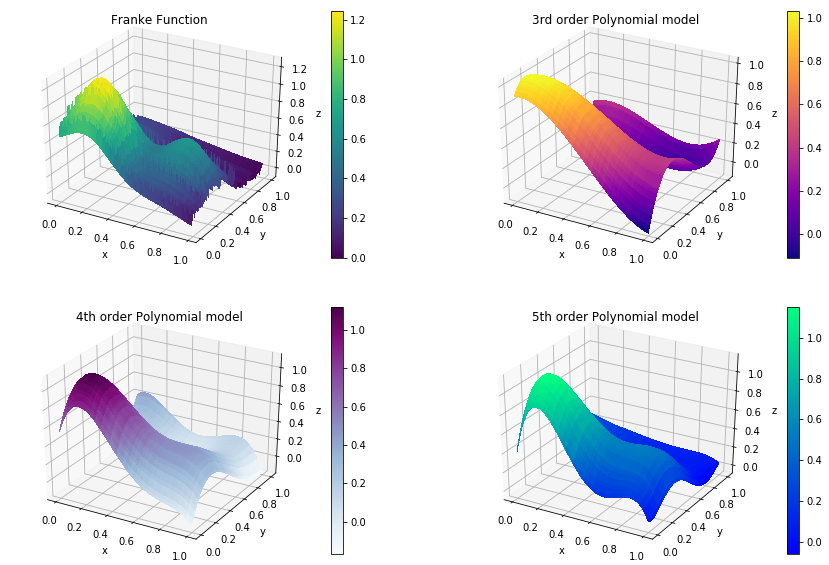

Variance of betas, 3rd order: [0.00963692 0.26625829 0.32638012 1.08851264 0.75443147 1.27795501
 0.4424957  0.33792672 0.42470209 0.51943886]
Variance of betas, 4th order: [2.04084549e-02 1.20171410e+00 1.45609236e+00 1.39290302e+01
 1.00552649e+01 1.65710388e+01 2.87863038e+01 1.67515961e+01
 1.80128639e+01 3.38140284e+01 7.10841475e+00 4.66444348e+00
 6.34171202e+00 5.17702231e+00 8.33914749e+00]
Variance of betas, 5th order: [3.64304762e-02 4.03736600e+00 4.77120479e+00 9.84070413e+01
 7.38340838e+01 1.13907175e+02 5.34497014e+02 3.30674252e+02
 3.30632106e+02 5.94890111e+02 6.16805333e+02 3.65165710e+02
 3.60937709e+02 3.89462714e+02 6.67799397e+02 9.86701761e+01
 7.27168110e+01 8.49483792e+01 7.50193736e+01 8.06563446e+01
 1.05700378e+02]
Mean squared error, 3rd order: 0.01615725629008317
Mean squared error, 4th order: 0.01472642847470691
Mean squared error, 5th order: 0.013024180584285325
R2 score 3rd order, 3rd order: 0.8580513641976417
R2 score 4th order, 4th order: 0.87062181

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Make some random uniform sorted data:

np.random.seed(13)

n = 100
xmin = 0
ymin = 0
xmax = 1
ymax = 1
error = 0.05

row = np.random.uniform(xmin, xmax, n)
col = np.random.uniform(ymin, ymax, n)

sort_inds_row = np.argsort(row) 
sort_inds_col = np.argsort(col)

x = row[sort_inds_row]
y = col[sort_inds_col]

# Definition of Franke function:

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + error*np.random.randn(n,xmax)

# Double letters refer to meshgrid data, needed for plotting

xx, yy = np.meshgrid(x, y)
zz = FrankeFunction(xx,yy)



from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ordinary least squares:

# Setting up the design matrices for 3rd, 4th and 5th order Polynomial:

poly3 = PolynomialFeatures(degree=3)
Xdes3 = poly3.fit_transform(np.c_[xx.ravel(), yy.ravel()])

poly4 = PolynomialFeatures(degree=4)
Xdes4 = poly4.fit_transform(np.c_[xx.ravel(), yy.ravel()])

poly5 = PolynomialFeatures(degree=5)
Xdes5 = poly5.fit_transform(np.c_[xx.ravel(), yy.ravel()])

# Reshaping the zz to fit the data

z = zz.reshape(-1,1)

# Setting up the fitting functions

ols3 = LinearRegression()
ols3.fit(Xdes3,z)

ols4 = LinearRegression()
ols4.fit(Xdes4,z)

ols5 = LinearRegression()
ols5.fit(Xdes5,z)

# New data for testing and plotting the model:

n_row = 100
n_col = 100

ax_row = np.random.rand(n_row)
ax_col = np.random.rand(n_col)

sort_inds_row = np.argsort(ax_row)
sort_inds_col = np.argsort(ax_col)

ROW = ax_row[sort_inds_row]
COL = ax_col[sort_inds_col]

ROWp, COLp = np.meshgrid(ROW, COL)

X3plot = poly3.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])
X4plot = poly4.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])
X5plot = poly5.fit_transform(np.c_[ROWp.ravel(), COLp.ravel()])

# This evaluates the height associated for each pair of coordinate made from np.meshgrid

Zpredict3 = ols3.predict(X3plot)
Zpredict4 = ols4.predict(X4plot)
Zpredict5 = ols5.predict(X5plot)

# Plot the generated surfaces for OLS models.

# Plot the surface.

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax.plot_surface(xx, yy, zz, cmap=cm.viridis, linewidth=0, antialiased=False)

# Customize the plot.
ax.set_title('Franke Function')
#ax.set_zlim(-0.10, 1.40)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# Add a color bar which maps values to colors.
fig.colorbar(surf)


#fig3 = plt.figure()
ax3 = fig.add_subplot(2, 2, 2, projection='3d')
surf = ax3.plot_surface(ROWp, COLp, Zpredict3.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.plasma)
ax3.set_title('3rd order Polynomial model')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
fig.colorbar(surf)

ax4 = fig.add_subplot(2, 2, 3, projection='3d')
#fig4 = plt.figure()
surf = ax4.plot_surface(ROWp, COLp, Zpredict4.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.BuPu)
ax4.set_title('4th order Polynomial model')
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("z")
fig.colorbar(surf)

#fig5 = plt.figure()
ax5 = fig.add_subplot(2, 2, 4, projection='3d')
surf = ax5.plot_surface(ROWp, COLp, Zpredict5.reshape(*ROWp.shape), linewidth = 0, antialiased = False, cmap=cm.winter)
ax5.set_title('5th order Polynomial model')
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_zlabel("z")
fig.colorbar(surf)

plt.show()

# Evaluating the OLS models: variances, MSE and R2 scores:

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

v_beta3 = np.diag(np.linalg.inv(Xdes3.T.dot(Xdes3)))
sigma3 = 1/(n-3-1) * np.sum((z-Zpredict3)**2)
var3 = v_beta3*sigma3
print('Variance of betas, 3rd order:', var3)

v_beta4 = np.diag(np.linalg.inv(Xdes4.T.dot(Xdes4)))
sigma4 = 1/(n-4-1) * np.sum((z-Zpredict4)**2)
var4 = v_beta4*sigma4
print('Variance of betas, 4th order:', var4)

v_beta5 = np.diag(np.linalg.inv(Xdes5.T.dot(Xdes5)))
sigma5 = 1/(n-5-1) * np.sum((z-Zpredict5)**2)
var5 = v_beta5*sigma5
print('Variance of betas, 5th order:', var5)

print("Mean squared error, 3rd order:", mean_squared_error(z,Zpredict3))
print("Mean squared error, 4th order:", mean_squared_error(z,Zpredict4))
print("Mean squared error, 5th order:", mean_squared_error(z,Zpredict5))

print('R2 score 3rd order, 3rd order:', r2_score(z,Zpredict3))
print('R2 score 4th order, 4th order:', r2_score(z,Zpredict4))
print('R2 score 5th order, 5th order:', r2_score(z,Zpredict5))

#fig.savefig('testplot.png')